<a href="https://colab.research.google.com/github/pankajroy97/Pankaj-Roy-LGMVIP--DataScience/blob/main/Develop_A_Neural_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

This code loads the MNIST dataset, which is a collection of handwritten digits (0-9) along with their corresponding labels. The dataset is split into training and testing sets.

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
#In this step, the input data x_train and x_test values are also scaled to the range [0, 1] by dividing by 255.
x_train=x_train/255
x_test=x_test/255 

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

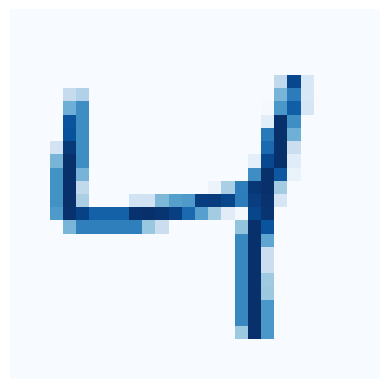

In [12]:
plt.imshow(x_train[2],cmap='Blues')
plt.axis('off')

In [13]:
#Build a data model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
model= Sequential()
model.add(Flatten(input_shape=(28,28))) #this  convert 2D to 1D ARRAY
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

This code create a sequential model using Keras. The model consists of a flattening layer that converts the 2D input images into a 1D array, followed by a dense layer with 128 shape and ReLU activation function and another dense layer with 10 shape and softmax activation function.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
#The code specifies the loss function (SparseCategoricalCrossentropy) and optimizer (adam) for the model. It then compiles the model with these settings.
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
#The model is trained using the training data (x_train and y_train) for 10 epochs.
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2824 - accuracy: 0.9199 - val_loss: 0.1583 - val_accuracy: 0.9532
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1267 - accuracy: 0.9627 - val_loss: 0.1191 - val_accuracy: 0.9648
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0863 - accuracy: 0.9743 - val_loss: 0.0986 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0934 - val_accuracy: 0.9711
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0853 - val_accuracy: 0.9737
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0856 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.0861 - val_accura

In [17]:
y_test_prediction=model.predict(x_test)
y_test_prediction

313/313 [==============================] - 1s 2ms/step


array([[2.71092176e-10, 5.41413138e-12, 2.89540026e-07, ...,
        9.99983132e-01, 9.85501125e-10, 2.58232831e-06],
       [1.17917210e-12, 2.85022611e-06, 9.99997079e-01, ...,
        2.02862125e-15, 1.38335038e-10, 9.78431001e-18],
       [3.50384568e-07, 9.99232054e-01, 2.99234467e-04, ...,
        3.72943352e-04, 6.61917366e-05, 1.02891962e-08],
       ...,
       [5.26721933e-16, 4.43105906e-14, 5.57113492e-14, ...,
        2.96965474e-08, 2.80387269e-09, 1.49393927e-05],
       [3.14147389e-11, 4.13210785e-11, 1.30057564e-14, ...,
        1.66321443e-10, 3.26971644e-06, 6.10079912e-13],
       [1.22548700e-08, 4.62825923e-11, 1.06990861e-08, ...,
        6.15233640e-14, 6.73155087e-10, 1.15258575e-11]], dtype=float32)

In [18]:
y_prdect=y_test_prediction.argmax(axis=1)
y_prdect

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prdect)

0.9754

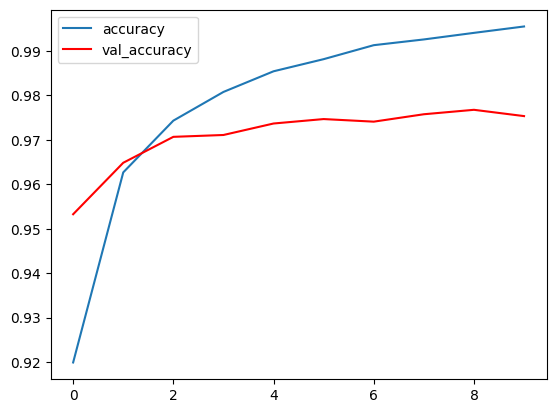

In [25]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='val_accuracy')
plt.legend()

(-0.5, 27.5, 27.5, -0.5)

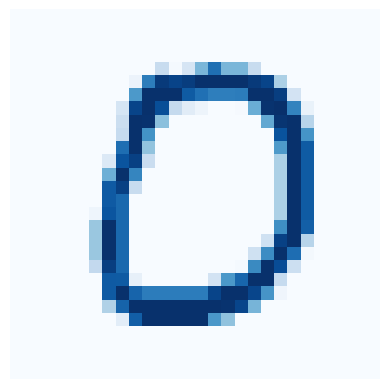

In [21]:
plt.imshow(x_test[10],cmap='Blues')
plt.axis('off')

In [22]:
model.predict(x_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 36ms/step


array([0])